# This is the homework portion.  I will be using Normalized Difference Vegetation Index (NDVI), Green Normalized difference vegetation index (GNDVI) and Normalized difference red edge (REVI) for this next part.

# Import necessary Libraries and set image file

In [2]:
from skimage.io import imread
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from scipy.spatial import distance
os.chdir(r'D:\Digital_Image_Processing\Lab_10')
img_txt = glob('*tif')[0]


In [3]:
img_txt

'crop_weeds_soil_msi.tif'

remember:
```python
g,r,e,i = img[:,:,0],img[:,:,1],img[:,:,2],img[:,:,3]
#where g is green, r is red, e is red edge, and i is near infrared.  

```

In [4]:
# img_txt
img = imread(img_txt)
row,col,bands = img.shape[0],img.shape[1],img.shape[2]
# row,col,bands
g,r,e,i = img[:,:,0],img[:,:,1],img[:,:,2],img[:,:,3]

# Vegetation Indicies

In [6]:
# Normalized Difference Vegetation Index (NDVI), green normalized difference vegetation index (GNDVI), Red Ege Vegetation Index (REVI)
NDVI = (i - r)/(i + r)
GNDVI = (i - g)/(i + g)
REVI = (i - e)/(i + e)
X = img.reshape(row*col,bands)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


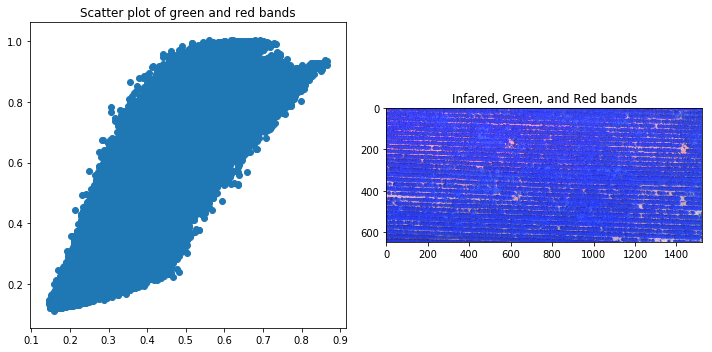

In [7]:
fig,ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].scatter(X[:,0],X[:,1])
ax[0].set_title('Scatter plot of green and red bands')
plt.imshow(img[:,:,(1,0,3)])
ax[1].set_title('Infared, Green, and Red bands')
plt.tight_layout()

# Without Indicies

# Kmeans Classification (without indicies)

In [8]:
# X.shape
n = 3
y_pred = KMeans(n_clusters=n, random_state=0).fit_predict(X)


In [9]:
y_img = y_pred.reshape(row,col)

# Minibatch Kmeans (without indicies)

In [18]:
y_pred_mini = MiniBatchKMeans(n_clusters=n, random_state=0).fit_predict(X)
y_img_mini = y_pred_mini.reshape(row,col)


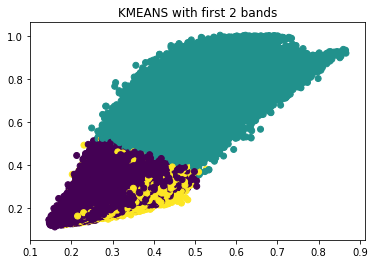

In [26]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c = y_pred)
plt.title('KMEANS with first 2 bands')
plt.show()

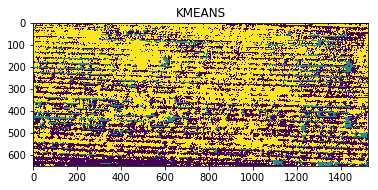

In [22]:
plt.imshow(y_img)
plt.title('KMEANS')
plt.show()

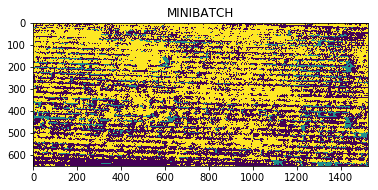

In [24]:
plt.imshow(y_img_mini)
plt.title('MINIBATCH')
plt.show()

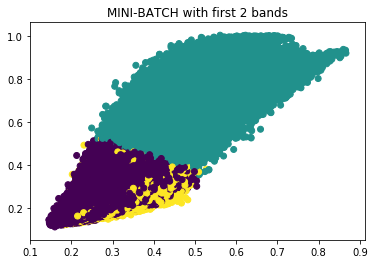

In [27]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_pred_mini)
plt.title('MINI-BATCH with first 2 bands')
plt.show()

# Add NDVI to image

In [50]:
img_ndvi = np.dstack((img,NDVI))
row,col,bands = img_ndvi.shape


1524

In [29]:
X_ndvi = img_ndvi.reshape(row*col,bands)

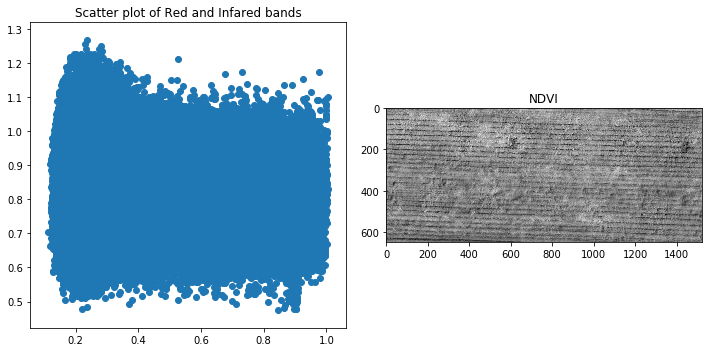

In [30]:
fig,ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].scatter(X_ndvi[:,1],X_ndvi[:,-2])
ax[0].set_title('Scatter plot of Red and Infared bands')
plt.imshow(img_ndvi[:,:,-2],cmap='gray')
ax[1].set_title('NDVI')
plt.tight_layout()
plt.show()

In [31]:
n = 3
y_pred = KMeans(n_clusters=n, random_state=0).fit_predict(X_ndvi)
y_pred_mini = MiniBatchKMeans(n_clusters=n, random_state=0).fit_predict(X_ndvi)

In [32]:
y_img,y_img_mini = y_pred.reshape(row,col),y_pred_mini.reshape(row,col)

# NDVI Kmeans Classification

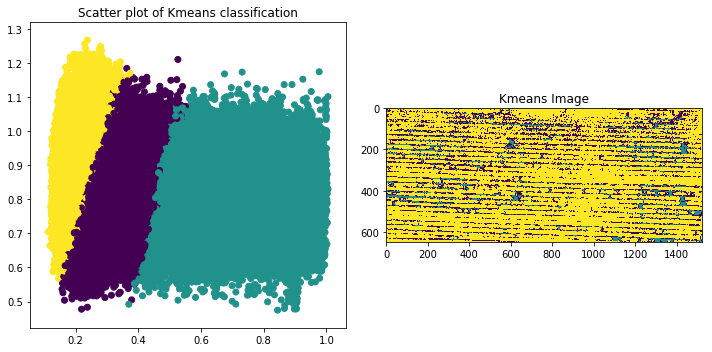

In [33]:
fig,ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].scatter(X_ndvi[:,1],X_ndvi[:,-2],c = y_pred)
ax[0].set_title('Scatter plot of Kmeans classification')
ax[1].imshow(y_img)
ax[1].set_title('Kmeans Image')

plt.tight_layout()
plt.show()

# NDVI MiniBatch Kmeans

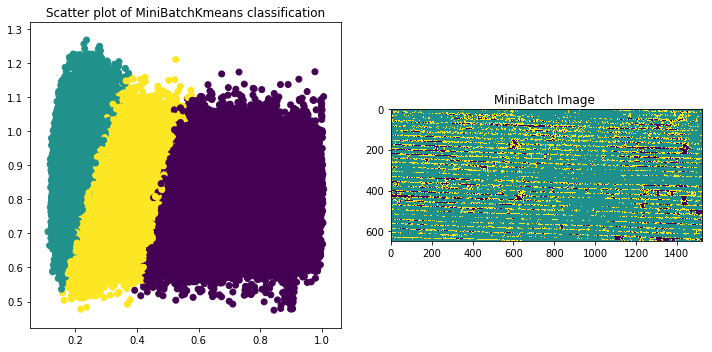

In [34]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
ax[0].scatter(X_ndvi[:,1],X_ndvi[:,-2],c = y_pred_mini)
ax[0].set_title('Scatter plot of MiniBatchKmeans classification')
ax[1].imshow(y_img_mini)
ax[1].set_title('MiniBatch Image ')
plt.tight_layout()
plt.show()

# Green Normalized Difference Vegetation Index

In [35]:
img_gndvi = np.dstack((img,GNDVI))
row,col,bands = img_gndvi.shape
X_gndvi = img_gndvi.reshape(row*col,bands)

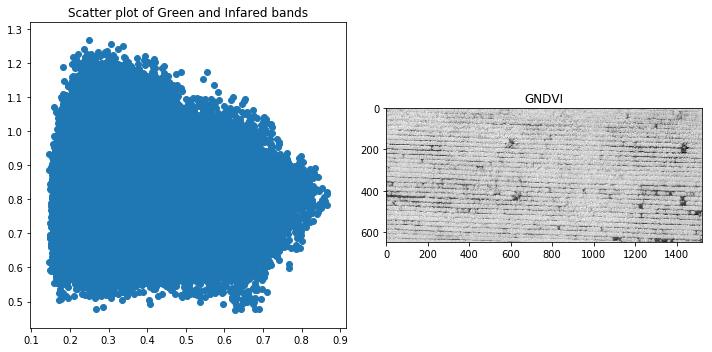

In [36]:
fig,ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].scatter(X_gndvi[:,0],X_gndvi[:,-2])
ax[0].set_title('Scatter plot of Green and Infared bands')
ax[1].imshow(img_gndvi[:,:,-1],cmap='gray')
ax[1].set_title('GNDVI')
plt.tight_layout()
plt.show()

In [39]:
n = 3
y_pred = KMeans(n_clusters=n, random_state=0).fit_predict(X_gndvi)
y_pred_mini = MiniBatchKMeans(n_clusters=n, random_state=0).fit_predict(X_gndvi)

In [40]:
y_img,y_img_mini = y_pred.reshape(row,col),y_pred_mini.reshape(row,col)

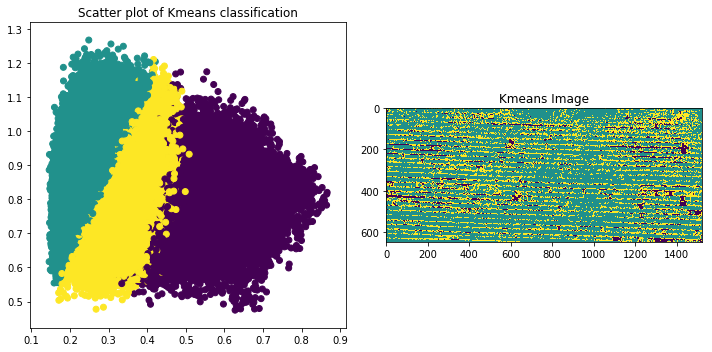

In [41]:
fig,ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].scatter(X_gndvi[:,0],X_gndvi[:,-2],c = y_pred)
ax[0].set_title('Scatter plot of Kmeans classification')
ax[1].imshow(y_img)
ax[1].set_title('Kmeans Image')

plt.tight_layout()
plt.show()

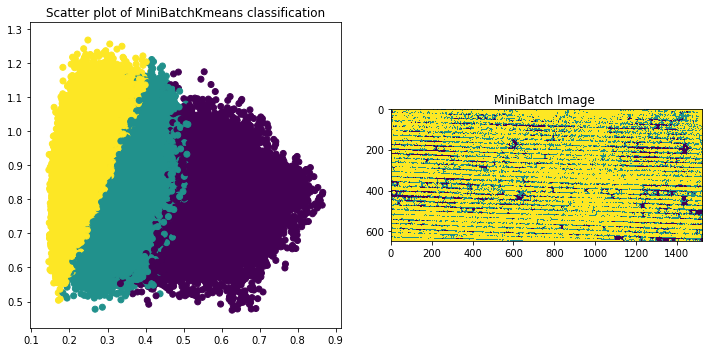

In [42]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
ax[0].scatter(X_gndvi[:,0],X_gndvi[:,-2],c = y_pred_mini)
ax[0].set_title('Scatter plot of MiniBatchKmeans classification')
ax[1].imshow(y_img_mini)
ax[1].set_title('MiniBatch Image ')
plt.tight_layout()
plt.show()

# Red Edge Vegetation Index (REVI)

In [43]:
img_revi = np.dstack((img,REVI))
row,col,bands = img_revi.shape
X_revi = img_revi.reshape(row*col,bands)

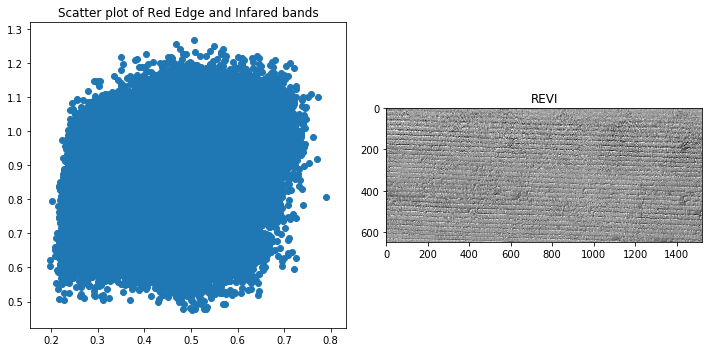

In [44]:
fig,ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].scatter(X_revi[:,2],X_revi[:,-2])
ax[0].set_title('Scatter plot of Red Edge and Infared bands')
ax[1].imshow(img_revi[:,:,-1],cmap='gray')
ax[1].set_title('REVI')
plt.tight_layout()
plt.show()

In [45]:
n = 3
y_pred = KMeans(n_clusters=n, random_state=0).fit_predict(X_revi)
y_pred_mini = MiniBatchKMeans(n_clusters=n, random_state=0).fit_predict(X_revi)
y_img,y_img_mini = y_pred.reshape(row,col),y_pred_mini.reshape(row,col)

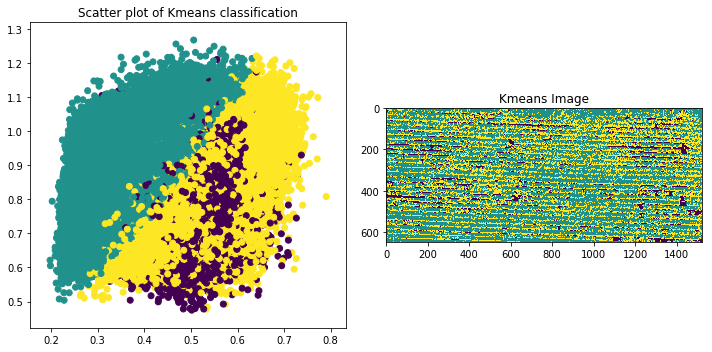

In [46]:
fig,ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].scatter(X_revi[:,2],X_revi[:,-2],c = y_pred)
ax[0].set_title('Scatter plot of Kmeans classification')
ax[1].imshow(y_img)
ax[1].set_title('Kmeans Image')

plt.tight_layout()
plt.show()

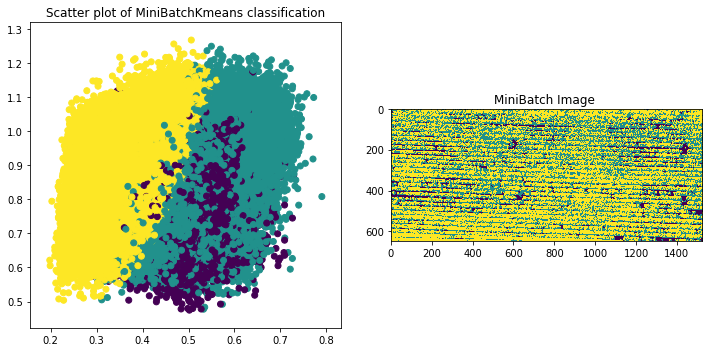

In [47]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
ax[0].scatter(X_revi[:,2],X_revi[:,-2],c = y_pred_mini)
ax[0].set_title('Scatter plot of MiniBatchKmeans classification')
ax[1].imshow(y_img_mini)
ax[1].set_title('MiniBatch Image ')
plt.tight_layout()
plt.show()